### PACKAGES

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import numpy as np
from sklearn.utils import shuffle
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

### DEFINE FUNCTIONS

#### timeit wrapper

In [2]:
def timing(f):
    def wrap(*args):
        time1 = time()
        ret = f(*args)
        time2 = time()
        print('{:s} function took {:.3f} ms'.format(f.__name__, (time2-time1)*1000.0))

        return ret
    return wrap

In [3]:
@timing
def run_func():
    print('hi')
run_func()

hi
run_func function took 0.000 ms


### IMPORT DATA

In [4]:
@timing
def import_data():
    
    #converter = lambda x: pd.to_numeric(x, 'coerce')
    #df = pd.read_csv('data\\raw\\PENN_SP500_daily.csv', delim_whitespace=True, converters={1: converter}, header=None)
    df = pd.read_csv('data\\raw\\stock2019.csv')
    #df = shuffle(df, random_state=0)
    df = df[['date',
    'TICKER',
    'COMNAM',
    'BIDLO',
    'ASKHI',
    'PRC',
    'VOL',
    'RET',
    #'BID',
    #'ASK',
    'SHROUT',
    'OPENPRC']]

    return df
    
df = import_data()
df.columns = ['date', 'symbol', 'name', 'bidlo', 'askhi', 'price', 'vol', 'ret', 
              #'bid', 'ask', 
              'sout', 'open']
print('initial shape {}'.format(df.shape))

df.head()

import_data function took 925.522 ms
initial shape (128952, 10)


C:\PROGRA1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (48,56) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,symbol,name,bidlo,askhi,price,vol,ret,sout,open
0,20190102,ORCL,ORACLE CORP,44.45,45.340,45.22,14320441.0,0.00155,3588919.0,44.48
1,20190103,ORCL,ORACLE CORP,44.41,45.500,44.78,19868713.0,-0.00973,3588919.0,44.75
2,20190104,ORCL,ORACLE CORP,45.25,46.950,46.71,20983953.0,0.0431,3588919.0,45.37
3,20190107,ORCL,ORACLE CORP,46.47,48.105,47.45,17967907.0,0.015842,3588919.0,46.93
4,20190108,ORCL,ORACLE CORP,47.20,48.360,47.88,16255688.0,0.009062,3588919.0,47.93


### BEGIN CLEANING

### DROP DUPLICATES

In [5]:
print('old shape {}'.format(df.shape))
df = df.drop_duplicates()
print('new shape: {}'.format(df.shape))

old shape (128952, 10)
new shape: (128946, 10)


### DROP ROWS WITH WRONG VALUES

In [6]:
"""MESSY DATA"""
indices_to_drop = df[df['ret']=='B'].index
df = df.drop(index=indices_to_drop)

indices_to_drop = df[df['ret']=='C'].index
df = df.drop(index=indices_to_drop)
#print('{} rows were dropped'.format(len(indices_to_drop)))

### STANDARDIZE, FORMALIZE COLUMNS (make into proper datatype)

#### CHANGE date to DATETIME

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')#, errors='ignore')
print(df.shape)
df.head()

(128941, 10)


,date,symbol,name,bidlo,askhi,price,vol,ret,sout,open
0,2019-01-02,ORCL,ORACLE CORP,44.45,45.340,45.22,14320441.0,0.00155,3588919.0,44.48
1,2019-01-03,ORCL,ORACLE CORP,44.41,45.500,44.78,19868713.0,-0.00973,3588919.0,44.75
2,2019-01-04,ORCL,ORACLE CORP,45.25,46.950,46.71,20983953.0,0.0431,3588919.0,45.37
3,2019-01-07,ORCL,ORACLE CORP,46.47,48.105,47.45,17967907.0,0.015842,3588919.0,46.93
4,2019-01-08,ORCL,ORACLE CORP,47.20,48.360,47.88,16255688.0,0.009062,3588919.0,47.93


#### CHANGE symbol, name columns to string

In [8]:
df['symbol'] = df['symbol'].astype(str)
df['name'] = df['name'].astype(str)

### CHANGE bidlo, askhi, price, vol, ret, bid, ask, sout, open to FLOAT

In [9]:
df['bidlo'] = df['bidlo'].astype(float)
df['askhi'] = df['askhi'].astype(float)
df['price'] = df['price'].astype(float)
df['vol'] = df['vol'].astype(float)
df['ret'] = df['ret'].astype(float)
#df['bid'] = df['bid'].astype(float)
#df['ask'] = df['ask'].astype(float)
df['sout'] = df['sout'].astype(float)
df['open'] = df['open'].astype(float)

#### CREATE NEW PRIMARY KEY TO BE APPLIED TO EACH TABLE
#### CONCATINATION BETWEEN SYMBOL AND COMPANY NAME

In [10]:
@timing
def create_key():
    key_list = []
    for i in range(len(df)):
        term = str(df.iloc[i, 1])
        if not term:
            value  = '0_'+df.iloc[i, 2]
            key_list.append(value)
        else:
            value = str(df.iloc[i, 1])+'_'+str(df.iloc[i, 2])
            key_list.append(value)

    return key_list

key_list = create_key()
df['key'] = key_list
del key_list

print('The final df has shape {}'.format(df.shape))
df.head()

create_key function took 3533.549 ms
The final df has shape (128941, 11)


,date,symbol,name,bidlo,askhi,price,vol,ret,sout,open,key
0,2019-01-02,ORCL,ORACLE CORP,44.45,45.340,45.22,14320441.0,0.001550,3588919.0,44.48,ORCL_ORACLE CORP
1,2019-01-03,ORCL,ORACLE CORP,44.41,45.500,44.78,19868713.0,-0.009730,3588919.0,44.75,ORCL_ORACLE CORP
2,2019-01-04,ORCL,ORACLE CORP,45.25,46.950,46.71,20983953.0,0.043100,3588919.0,45.37,ORCL_ORACLE CORP
3,2019-01-07,ORCL,ORACLE CORP,46.47,48.105,47.45,17967907.0,0.015842,3588919.0,46.93,ORCL_ORACLE CORP
4,2019-01-08,ORCL,ORACLE CORP,47.20,48.360,47.88,16255688.0,0.009062,3588919.0,47.93,ORCL_ORACLE CORP


In [11]:
oknk = pd.read_csv('data\\external\\old_key_new_key.csv')
oknk.head()

,OLD_KEY,NEW_KEY
0,ACN_ACCENTURE LTD BERMUDA,ACN_ACCENTURE
1,ACN_ACCENTURE PLC IRELAND,ACN_ACCENTURE
2,ADBE_ADOBE INC,ADBE_ADOBE
3,ADBE_ADOBE SYSTEMS INC,ADBE_ADOBE
4,BIIB_BIOGEN IDEC INC,BIIB_BIOGEN


In [12]:
df_merge = pd.merge(df, oknk, left_on='key', right_on='OLD_KEY', copy=False)
df_merge = df_merge.drop_duplicates()
#df_merge.index = df_merge['NEW_KEY']
df_merge = df_merge.drop(['key'], axis=1)
df_merge.head()

,date,symbol,name,bidlo,askhi,price,vol,ret,sout,open,OLD_KEY,NEW_KEY
0,2019-01-02,ORCL,ORACLE CORP,44.45,45.340,45.22,14320441.0,0.001550,3588919.0,44.48,ORCL_ORACLE CORP,ORCL_ORACLE CORP
1,2019-01-03,ORCL,ORACLE CORP,44.41,45.500,44.78,19868713.0,-0.009730,3588919.0,44.75,ORCL_ORACLE CORP,ORCL_ORACLE CORP
2,2019-01-04,ORCL,ORACLE CORP,45.25,46.950,46.71,20983953.0,0.043100,3588919.0,45.37,ORCL_ORACLE CORP,ORCL_ORACLE CORP
3,2019-01-07,ORCL,ORACLE CORP,46.47,48.105,47.45,17967907.0,0.015842,3588919.0,46.93,ORCL_ORACLE CORP,ORCL_ORACLE CORP
4,2019-01-08,ORCL,ORACLE CORP,47.20,48.360,47.88,16255688.0,0.009062,3588919.0,47.93,ORCL_ORACLE CORP,ORCL_ORACLE CORP


#### CREATE LIST OF NEW KEYS

In [13]:
new_key_list = df_merge['NEW_KEY'].unique()
print(len(new_key_list))
new_key_list[0]

501


'ORCL_ORACLE CORP'

In [14]:
print(df.shape)
print(df_merge.shape)

(128941, 11)
(126232, 12)


## CREATE TABLES/ENTITIES
###### ...
###### ...

##### CHECK THE KEYS ARE UNIQUE

## FILTER THE DATAFRAME 1/1/2019 - 12/31/18

In [17]:
print('before format: {}'.format(df_merge.shape))
df_merge = df_merge[(df_merge['date']>='2019-1-1') & (df_merge['date']<='2019-12-31')]
print('after filter: {}'.format(df_merge.shape))
df_merge.head()

before format: (126232, 12)
after filter: (126232, 12)


,date,symbol,name,bidlo,askhi,price,vol,ret,sout,open,OLD_KEY,NEW_KEY
0,2019-01-02,ORCL,ORACLE CORP,44.45,45.340,45.22,14320441.0,0.001550,3588919.0,44.48,ORCL_ORACLE CORP,ORCL_ORACLE CORP
1,2019-01-03,ORCL,ORACLE CORP,44.41,45.500,44.78,19868713.0,-0.009730,3588919.0,44.75,ORCL_ORACLE CORP,ORCL_ORACLE CORP
2,2019-01-04,ORCL,ORACLE CORP,45.25,46.950,46.71,20983953.0,0.043100,3588919.0,45.37,ORCL_ORACLE CORP,ORCL_ORACLE CORP
3,2019-01-07,ORCL,ORACLE CORP,46.47,48.105,47.45,17967907.0,0.015842,3588919.0,46.93,ORCL_ORACLE CORP,ORCL_ORACLE CORP
4,2019-01-08,ORCL,ORACLE CORP,47.20,48.360,47.88,16255688.0,0.009062,3588919.0,47.93,ORCL_ORACLE CORP,ORCL_ORACLE CORP


### PICK THE COMPANIES THAT ACTUALLY MADE from 1/1/2019-12/31/2019

In [19]:
new_key_list = df_merge[df_merge['date'] == '2019-12-31']['NEW_KEY'].unique()
print(len(new_key_list))

486


## CREATE THE TABLES:
- BIDLO/BID
- ASKHI/ASK
- PRICE
- VOLUME
- RETURNS
- OPEN PRICE
- SHARES OUTSTANDING

# (filter out the companies which did not trade daily)
### BIDLO 

In [20]:
@timing
def bidlo_func():

    bidlo_error = []
    df_bidlo = df_merge[['date', 'NEW_KEY', 'bidlo']]
    ########----------------#######
    df_bidlo_temp = pd.DataFrame([])
    #for symbol in list_symbol:
    for symbol in new_key_list:
    #for symbol in error_bidlo:
        try:
            df_temp = df_bidlo[df_bidlo['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            #print('setting {} date index'.format(symbol))
            df_temp.index=df_temp['date']
            #print('subsetting {} bidlo'.format(symbol))            
            df_temp = df_temp[['bidlo']]
            #print(len(df_temp))
            #print('setting {} transpose'.format(symbol))            
            df_temp = df_temp.T
            #print('changin {} index'.format(symbol))
            df_temp.index = [symbol]
            #df_temp.rename()
            #print('CONCATENATING {}'.format(symbol))
            df_bidlo_temp = pd.concat([df_bidlo_temp, df_temp], axis=0) ### TEMP
            #print('finished with {}\n'.format(symbol))
        except Exception as e:
        #except: 
            #print(symbol, e)
            bidlo_error.append(symbol)
            
    return df_bidlo_temp, bidlo_error
    
df_bidlo, error_bidlo = bidlo_func()
print(len(error_bidlo), df_bidlo.shape)
#pd.Series(error_bidlo).to_csv('data\\interim\\error_bidlo_temp.csv')
df_bidlo.head()

bidlo_func function took 5203.094 ms
4 (482, 252)


date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
ORCL_ORACLE CORP,44.45,44.41000,45.2500,46.47000,47.20000,46.61000,46.88,47.3700,47.62,47.41000,...,52.83,52.95000,53.04000,53.35000,53.61,53.35500,53.28000,53.34000,52.62000,52.55000
MSFT_MICROSOFT CORP,98.94,97.20000,98.9300,100.98000,101.71340,103.24450,102.38,101.6400,101.26,101.88000,...,154.45,154.17999,153.75000,156.28999,157.27,157.11501,157.39999,158.22000,156.73000,156.45000
TROW_T ROWE PRICE GROUP INC,90.22,88.58000,89.2100,91.14000,91.43000,91.51000,91.40,89.5400,89.23,91.06500,...,122.74,121.91000,121.93000,121.85000,121.50,121.19000,122.09000,122.55000,121.45000,120.93000
HON_HONEYWELL INTERNATIONAL INC,129.50,129.07001,132.0475,133.14999,134.32001,135.06641,134.67,136.4100,135.98,136.53999,...,175.81,174.41000,174.49001,176.14999,175.81,175.73000,175.72000,176.28999,175.75999,175.46001
ADM_ARCHER DANIELS MIDLAND CO,40.53,40.40000,41.0900,41.47000,42.03000,42.70000,42.78,42.8764,42.68,42.89500,...,46.17,44.87000,45.28000,45.70000,45.53,46.01000,45.95000,46.11000,46.02000,45.98000


#### Error Note
- There are Duplicate dates for each stock in the error dataframe


#### Take LOWEST BIDLO value for each of the duplicated dates
- Same with BID

In [21]:
df_error_bidlo = pd.DataFrame([])

for error_comapny in error_bidlo:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'bidlo']]
    df_error_bidlo = pd.concat([df_error_bidlo, temp_df])

df_error_bidlo = df_error_bidlo.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_bidlo.shape))
df_error_bidlo = df_error_bidlo.groupby(['NEW_KEY', 'date'], sort=False).min()
print('shape after the drop {}'.format(df_error_bidlo.shape))
df_error_bidlo.head()

##########---------------###-------########------------#########

print('before adding error dataframes: {}'.format(df_bidlo.shape))

for symbol in error_bidlo:
    df_temp = df_error_bidlo.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_bidlo = pd.concat([df_bidlo, df_temp], axis=0) ### TEMP
    
print('after adding error dataframes: {}'.format(df_bidlo.shape))
df_bidlo.head()

shape before drop: (2016, 3)
shape after the drop (1008, 1)
before adding error dataframes: (482, 252)
after adding error dataframes: (486, 252)


date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
ORCL_ORACLE CORP,44.45,44.41000,45.2500,46.47000,47.20000,46.61000,46.88,47.3700,47.62,47.41000,...,52.83,52.95000,53.04000,53.35000,53.61,53.35500,53.28000,53.34000,52.62000,52.55000
MSFT_MICROSOFT CORP,98.94,97.20000,98.9300,100.98000,101.71340,103.24450,102.38,101.6400,101.26,101.88000,...,154.45,154.17999,153.75000,156.28999,157.27,157.11501,157.39999,158.22000,156.73000,156.45000
TROW_T ROWE PRICE GROUP INC,90.22,88.58000,89.2100,91.14000,91.43000,91.51000,91.40,89.5400,89.23,91.06500,...,122.74,121.91000,121.93000,121.85000,121.50,121.19000,122.09000,122.55000,121.45000,120.93000
HON_HONEYWELL INTERNATIONAL INC,129.50,129.07001,132.0475,133.14999,134.32001,135.06641,134.67,136.4100,135.98,136.53999,...,175.81,174.41000,174.49001,176.14999,175.81,175.73000,175.72000,176.28999,175.75999,175.46001
ADM_ARCHER DANIELS MIDLAND CO,40.53,40.40000,41.0900,41.47000,42.03000,42.70000,42.78,42.8764,42.68,42.89500,...,46.17,44.87000,45.28000,45.70000,45.53,46.01000,45.95000,46.11000,46.02000,45.98000


#### FILTER THE STOCKS THAT TRADED EVERY DAY FROM 1/1/2019 - 12/31/2019

(array([  0.,   0.,   0.,   0.,   0., 486.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

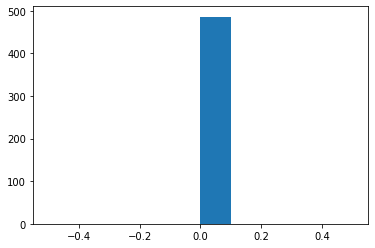

In [23]:
keep_list = []
null_list = []
for symbol in new_key_list:
    temp_value = df_bidlo.T[symbol].isnull().sum()
    null_list.append(temp_value)
    if temp_value == 0:
        keep_list.append(symbol)
    
plt.hist(null_list)

In [24]:
pd.Series(null_list).value_counts().sort_values(ascending=False)

0    486
dtype: int64

# create list of companies that actually traded during the trading period

In [25]:
new_key_list = keep_list

# Begin HERE

### BIDLO (with continuously traded companies filtered out)

In [32]:
@timing
def bidlo_func():

    bidlo_error = []
    df_bidlo = df_merge[['date', 'NEW_KEY', 'bidlo']]
    ########----------------#######
    df_bidlo_temp = pd.DataFrame([])
    #for symbol in list_symbol:
    for symbol in new_key_list:
    #for symbol in error_bidlo:
        try:
            df_temp = df_bidlo[df_bidlo['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            #print('setting {} date index'.format(symbol))
            df_temp.index=df_temp['date']
            #print('subsetting {} bidlo'.format(symbol))            
            df_temp = df_temp[['bidlo']]
            #print(len(df_temp))
            #print('setting {} transpose'.format(symbol))            
            df_temp = df_temp.T
            #print('changin {} index'.format(symbol))
            df_temp.index = [symbol]
            #df_temp.rename()
            #print('CONCATENATING {}'.format(symbol))
            df_bidlo_temp = pd.concat([df_bidlo_temp, df_temp], axis=0) ### TEMP
            #print('finished with {}\n'.format(symbol))
        except Exception as e:
        #except: 
            #print(symbol, e)
            bidlo_error.append(symbol)
            
    return df_bidlo_temp, bidlo_error
    
df_bidlo, error_bidlo = bidlo_func()
print(len(error_bidlo), df_bidlo.shape)
#pd.Series(error_bidlo).to_csv('data\\interim\\error_bidlo_temp.csv')
df_bidlo.head()

bidlo_func function took 5879.275 ms
4 (482, 252)


date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
ORCL_ORACLE CORP,44.45,44.41000,45.2500,46.47000,47.20000,46.61000,46.88,47.3700,47.62,47.41000,...,52.83,52.95000,53.04000,53.35000,53.61,53.35500,53.28000,53.34000,52.62000,52.55000
MSFT_MICROSOFT CORP,98.94,97.20000,98.9300,100.98000,101.71340,103.24450,102.38,101.6400,101.26,101.88000,...,154.45,154.17999,153.75000,156.28999,157.27,157.11501,157.39999,158.22000,156.73000,156.45000
TROW_T ROWE PRICE GROUP INC,90.22,88.58000,89.2100,91.14000,91.43000,91.51000,91.40,89.5400,89.23,91.06500,...,122.74,121.91000,121.93000,121.85000,121.50,121.19000,122.09000,122.55000,121.45000,120.93000
HON_HONEYWELL INTERNATIONAL INC,129.50,129.07001,132.0475,133.14999,134.32001,135.06641,134.67,136.4100,135.98,136.53999,...,175.81,174.41000,174.49001,176.14999,175.81,175.73000,175.72000,176.28999,175.75999,175.46001
ADM_ARCHER DANIELS MIDLAND CO,40.53,40.40000,41.0900,41.47000,42.03000,42.70000,42.78,42.8764,42.68,42.89500,...,46.17,44.87000,45.28000,45.70000,45.53,46.01000,45.95000,46.11000,46.02000,45.98000


#### Error Note
- There are Duplicate dates for each stock in the error dataframe


#### Take LOWEST BIDLO value for each of the duplicated dates
- Same with BID

In [33]:
df_error_bidlo = pd.DataFrame([])

for error_comapny in error_bidlo:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'bidlo']]
    df_error_bidlo = pd.concat([df_error_bidlo, temp_df])

df_error_bidlo = df_error_bidlo.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_bidlo.shape))
df_error_bidlo = df_error_bidlo.groupby(['NEW_KEY', 'date'], sort=False).min()
print('shape after the drop {}'.format(df_error_bidlo.shape))
df_error_bidlo.head()

##########---------------###-------########------------#########

print('before adding error dataframes: {}'.format(df_bidlo.shape))

for symbol in error_bidlo:
    df_temp = df_error_bidlo.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_bidlo = pd.concat([df_bidlo, df_temp], axis=0) ### TEMP
    
print('after adding error dataframes: {}'.format(df_bidlo.shape))
df_bidlo.head()

shape before drop: (2016, 3)
shape after the drop (1008, 1)
before adding error dataframes: (482, 252)
after adding error dataframes: (486, 252)


date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
ORCL_ORACLE CORP,44.45,44.41000,45.2500,46.47000,47.20000,46.61000,46.88,47.3700,47.62,47.41000,...,52.83,52.95000,53.04000,53.35000,53.61,53.35500,53.28000,53.34000,52.62000,52.55000
MSFT_MICROSOFT CORP,98.94,97.20000,98.9300,100.98000,101.71340,103.24450,102.38,101.6400,101.26,101.88000,...,154.45,154.17999,153.75000,156.28999,157.27,157.11501,157.39999,158.22000,156.73000,156.45000
TROW_T ROWE PRICE GROUP INC,90.22,88.58000,89.2100,91.14000,91.43000,91.51000,91.40,89.5400,89.23,91.06500,...,122.74,121.91000,121.93000,121.85000,121.50,121.19000,122.09000,122.55000,121.45000,120.93000
HON_HONEYWELL INTERNATIONAL INC,129.50,129.07001,132.0475,133.14999,134.32001,135.06641,134.67,136.4100,135.98,136.53999,...,175.81,174.41000,174.49001,176.14999,175.81,175.73000,175.72000,176.28999,175.75999,175.46001
ADM_ARCHER DANIELS MIDLAND CO,40.53,40.40000,41.0900,41.47000,42.03000,42.70000,42.78,42.8764,42.68,42.89500,...,46.17,44.87000,45.28000,45.70000,45.53,46.01000,45.95000,46.11000,46.02000,45.98000


# CHECK WHETEHR THE DUPLICATE COLUM NEEDS TO BE MAXIMIZED OR DROPPED!

### ASKHI TABLE

In [34]:
@timing
def askhi_func():
    error_askhi = []
    df_askhi = df_merge[['date', 'NEW_KEY', 'askhi']]
    df_askhi_temp = pd.DataFrame([])
    
    for symbol in new_key_list:
        try:
            df_temp = df_askhi[df_askhi['NEW_KEY']==symbol]
            df_temp.index=df_temp['date']
            df_temp = df_temp[['askhi']]
            df_temp = df_temp.T
            df_temp.index = [symbol]
            df_askhi_temp = pd.concat([df_askhi_temp, df_temp], axis=0)

        #except:
        except Exception as e:
            #print(symbol, e)
            error_askhi.append(symbol)
    return df_askhi_temp, error_askhi

df_askhi, error_askhi = askhi_func()
print(len(error_askhi), df_askhi.shape)
#pd.Series(error_askhi).to_csv('..\data\\error_askhi.csv')
#df_askhi.head(2)

askhi_func function took 4995.630 ms
4 (482, 252)


### Take the error dataframe and filter out the highest ASKHI value for each of the days of each of the companies
- Same with ASK

In [35]:
df_error_askhi = pd.DataFrame([])

for error_comapny in error_askhi:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'askhi']]
    df_error_askhi = pd.concat([df_error_askhi, temp_df])

df_error_askhi = df_error_askhi.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_askhi.shape))
"""TAKE THE MAX ASKHI"""
df_error_askhi = df_error_askhi.groupby(['NEW_KEY', 'date'], sort=False).max()
print('shape after the drop {}'.format(df_error_askhi.shape))
#df_error_askhi.head()

#######----------#############-------------########
print('before adding error dataframes: {}'.format(df_askhi.shape))

for symbol in error_askhi:
    df_temp = df_error_askhi.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_askhi = pd.concat([df_askhi, df_temp], axis=0) ### TEMP
    
print('after adding error dataframes: {}'.format(df_askhi.shape))
df_askhi.head()

shape before drop: (2016, 3)
shape after the drop (1008, 1)
before adding error dataframes: (482, 252)
after adding error dataframes: (486, 252)


date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
ORCL_ORACLE CORP,45.34,45.500,46.95000,48.1050,48.36,48.23000,47.98,48.6197,48.3400,48.52500,...,54.06000,53.61,53.60,53.95000,54.065,53.96000,53.66000,53.80000,53.490,53.0000
MSFT_MICROSOFT CORP,101.75,100.185,102.51000,103.2681,103.97,104.88000,103.75,103.4400,102.8716,105.05000,...,155.71001,155.48,155.77,158.49001,158.120,157.71001,158.73000,159.55000,159.020,157.7700
TROW_T ROWE PRICE GROUP INC,92.42,91.640,92.06000,92.9100,93.32,93.68000,92.82,91.7400,92.0750,92.77000,...,123.71000,123.62,122.70,123.86000,123.180,122.43000,122.95000,123.24000,123.320,122.1699
HON_HONEYWELL INTERNATIONAL INC,132.09,132.980,135.03999,136.0000,136.88,136.74001,137.94,137.7500,138.0397,138.14999,...,177.24001,177.03,176.62,177.69000,177.380,176.85001,176.89999,177.24001,177.000,177.0800
ADM_ARCHER DANIELS MIDLAND CO,41.15,41.340,41.81000,42.4400,42.74,43.45000,43.39,43.4800,43.1400,43.52000,...,47.20000,46.15,45.65,46.59000,46.050,46.27000,46.38000,46.40000,46.458,46.3800


In [31]:
#df_askhi.to_csv('data\\external\\temp_askhi.csv')

### PRICE TABLE

In [26]:
@timing
def price_func():
    error_price = []
    
    df_price = df_merge[['date', 'NEW_KEY', 'price']]
    ########----------------#######
    df_price_temp = pd.DataFrame([])
    for symbol in new_key_list:
        try:
            df_temp = df_price[df_price['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            df_temp.index=df_temp['date']
            df_temp = df_temp[['price']]
            df_temp = df_temp.T
            df_temp.index = [symbol]
            #df_temp.rename()
            df_price_temp = pd.concat([df_price_temp, df_temp], axis=0) ### TEMP
        except Exception as e:
            #print(symbol, e)
            error_price.append(symbol)
    return df_price_temp, error_price

df_price, error_price = price_func()
print(len(error_price), df_price.shape)
#pd.Series(error_price).to_csv('..\data\\error_price.csv')
#df_price.head(2)

price_func function took 5425.611 ms
4 (482, 252)


##### take MAX price

In [28]:
df_error_price = pd.DataFrame([])

for error_comapny in error_price:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'price']]
    df_error_price = pd.concat([df_error_price, temp_df])

df_error_price = df_error_price.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_price.shape))
"""TAKE THE MAX PRICE"""
df_error_price = df_error_price.groupby(['NEW_KEY', 'date'], sort=False).max()
print('shape after the drop {}'.format(df_error_price.shape))
#df_error_askhi.head()

#######----------#############-------------########
print('before adding error dataframes: {}'.format(df_price.shape))

for symbol in error_price:
    df_temp = df_error_price.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_price = pd.concat([df_price, df_temp], axis=0) ### TEMP

    
"""DROP DUPLICATES"""
df_price = abs(df_price.drop_duplicates())    
print('after adding error dataframes: {}'.format(df_price.shape))
df_price.head()

shape before drop: (2016, 3)
shape after the drop (1008, 1)
before adding error dataframes: (482, 252)
after adding error dataframes: (486, 252)


date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
ORCL_ORACLE CORP,45.22,44.78000,46.71,47.45,47.88,47.78,47.82,48.29,48.18,48.38,...,52.84,53.39,53.24000,53.60,53.71000,53.44,53.57,53.46000,52.70,52.98
MSFT_MICROSOFT CORP,101.12,97.40000,101.93,102.06,102.80,104.27,103.60,102.80,102.05,105.01,...,154.69,154.37,155.71001,157.41,157.41000,157.38,158.67,158.96001,157.59,157.70
TROW_T ROWE PRICE GROUP INC,91.84,88.81000,91.98,91.85,92.32,92.65,92.29,90.25,91.19,92.75,...,123.02,122.40,122.52000,122.54,121.62000,122.20,122.87,122.82000,121.81,121.84
HON_HONEYWELL INTERNATIONAL INC,131.83,130.07001,134.62,135.37,135.09,135.72,137.75,137.36,137.61,137.77,...,176.70,174.64,176.50000,176.41,176.42999,176.31,176.88,176.48000,176.42,177.00
ADM_ARCHER DANIELS MIDLAND CO,40.95,40.77000,41.71,41.92,42.70,43.07,43.37,43.16,42.85,43.48,...,46.21,45.31,45.64000,45.79,46.02000,46.08,46.20,46.30000,46.12,46.35


### VOLUME TABLE

In [36]:
@timing
def volume_func():
    error_volume = []
    
    df_volume = df_merge[['date', 'NEW_KEY', 'vol']]
    ########----------------#######
    df_volume_temp = pd.DataFrame([])
    for symbol in new_key_list:
        try:            
            df_temp = df_volume[df_volume['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            df_temp.index=df_temp['date']
            df_temp = df_temp[['vol']]
            df_temp = df_temp.T
            df_temp.index = [symbol]
            #df_temp.rename()
            df_volume_temp = pd.concat([df_volume_temp, df_temp], axis=0) ### TEMP    
        except:
            error_volume.append(symbol)
    return df_volume_temp, error_volume

df_volume, error_volume = volume_func()
print(len(error_volume), df_volume.shape)
#pd.Series(error_volume).to_csv('..\data\\error_volume.csv')
#df_volume.head(2)        

volume_func function took 5624.074 ms
4 (482, 252)


##### take MAX volume

In [37]:
df_error_volume = pd.DataFrame([])

for error_comapny in error_volume:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'vol']]
    df_error_volume = pd.concat([df_error_volume, temp_df])

df_error_volume = df_error_volume.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_volume.shape))
"""TAKE THE MAX PRICE"""
df_error_volume = df_error_volume.groupby(['NEW_KEY', 'date'], sort=False).max()
print('shape after the drop {}'.format(df_error_volume.shape))
#df_error_askhi.head()

#######----------#############-------------########
print('before adding error dataframes: {}'.format(df_volume.shape))

for symbol in error_volume:
    df_temp = df_error_volume.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_volume = pd.concat([df_volume, df_temp], axis=0) ### TEMP

    
"""DROP DUPLICATES"""
df_volume = df_volume.drop_duplicates()    
print('after adding error dataframes: {}'.format(df_volume.shape))
df_volume.head()

shape before drop: (2016, 3)
shape after the drop (1008, 1)
before adding error dataframes: (482, 252)
after adding error dataframes: (486, 252)


date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
ORCL_ORACLE CORP,14320441.0,19868713.0,20983953.0,17967907.0,16255688.0,19100183.0,16652730.0,16397521.0,14869411.0,12142144.0,...,19782558.0,14123168.0,11910116.0,27423669.0,10591502.0,3331654.0,6702209.0,7262263.0,5936134.0,7095128.0
MSFT_MICROSOFT CORP,35347045.0,42570779.0,44032862.0,35650303.0,31531077.0,32279340.0,30055256.0,28277502.0,28416379.0,31572516.0,...,25413765.0,24077567.0,25782854.0,53562690.0,17693329.0,8981380.0,14513766.0,18401203.0,16329244.0,18362745.0
TROW_T ROWE PRICE GROUP INC,1180463.0,1908997.0,1821211.0,1372821.0,1690420.0,1469940.0,1678084.0,2427168.0,1472046.0,1297548.0,...,911998.0,1012999.0,852052.0,2132735.0,674158.0,316300.0,307871.0,509897.0,612887.0,894202.0
HON_HONEYWELL INTERNATIONAL INC,2756347.0,3183974.0,3583572.0,2944574.0,2636179.0,1993192.0,2149743.0,1890355.0,3100638.0,1841881.0,...,3039797.0,3614707.0,2680623.0,4351970.0,2577740.0,625477.0,1270050.0,1303946.0,1670057.0,1728875.0
ADM_ARCHER DANIELS MIDLAND CO,2496963.0,3272994.0,3117107.0,3970147.0,5096803.0,3530141.0,2934087.0,2513626.0,3107608.0,2773346.0,...,3205007.0,4433861.0,3144207.0,6372995.0,1866619.0,708280.0,985139.0,1355006.0,1375597.0,1787220.0


### RETURNS TABLE

In [29]:
@timing
def returns_func():
    error_returns = []
    df_return = df_merge[['date', 'NEW_KEY', 'ret']]
    ########----------------#######
    df_return_temp = pd.DataFrame([])
    for symbol in new_key_list:
        try:
            df_temp = df_return[df_return['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            df_temp.index=df_temp['date']
            df_temp = df_temp[['ret']]
            df_temp = df_temp.T
            df_temp.index = [symbol]
            #df_temp.rename()
            df_return_temp = pd.concat([df_return_temp, df_temp], axis=0) ### TEMP
        except:
            error_returns.append(symbol)
    return df_return_temp, error_returns

df_returns, error_returns = returns_func()
print(len(error_returns), df_returns.shape)
#pd.Series(error_returns).to_csv('..\data\\error_returns.csv')
#df_returns.head(2)            

returns_func function took 5296.863 ms
4 (482, 252)


##### take max RETUNRS 

In [30]:
df_error_returns = pd.DataFrame([])

for error_comapny in error_returns:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'ret']]
    df_error_returns = pd.concat([df_error_returns, temp_df])

df_error_returns = df_error_returns.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_returns.shape))
"""TAKE THE MAX PRICE"""
df_error_returns = df_error_returns.groupby(['NEW_KEY', 'date'], sort=False).max()
print('shape after the drop {}'.format(df_error_returns.shape))
#df_error_askhi.head()

#######----------#############-------------########
print('before adding error dataframes: {}'.format(df_returns.shape))

for symbol in error_returns:
    df_temp = df_error_returns.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_returns = pd.concat([df_returns, df_temp], axis=0) ### TEMP

    
"""DROP DUPLICATES"""
df_returns = df_returns.drop_duplicates()    
print('after adding error dataframes: {}'.format(df_returns.shape))
df_returns.head()

shape before drop: (2016, 3)
shape after the drop (1008, 1)
before adding error dataframes: (482, 252)
after adding error dataframes: (486, 252)


date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
ORCL_ORACLE CORP,0.001550,-0.009730,0.043100,0.015842,0.009062,-0.002089,0.000837,0.009829,-0.002278,0.008095,...,-0.021300,0.010409,-0.002809,0.006762,0.002052,-0.005027,0.002433,-0.002053,-0.014216,0.005313
MSFT_MICROSOFT CORP,-0.004430,-0.036788,0.046509,0.001275,0.007251,0.014300,-0.006426,-0.007722,-0.007296,0.029005,...,-0.005401,-0.002069,0.008681,0.010918,0.000000,-0.000191,0.008197,0.001828,-0.008619,0.000698
TROW_T ROWE PRICE GROUP INC,-0.005199,-0.032992,0.035694,-0.001413,0.005117,0.003575,-0.003886,-0.022104,0.010416,0.017107,...,-0.001785,-0.005040,0.000980,0.000163,-0.007508,0.004769,0.005483,-0.000407,-0.008223,0.000246
HON_HONEYWELL INTERNATIONAL INC,-0.002195,-0.013350,0.034981,0.005571,-0.002068,0.004664,0.014957,-0.002831,0.001820,0.001163,...,0.001701,-0.011658,0.010650,-0.000510,0.000113,-0.000680,0.003233,-0.002261,-0.000340,0.003288
ADM_ARCHER DANIELS MIDLAND CO,-0.000488,-0.004396,0.023056,0.005035,0.018607,0.008665,0.006965,-0.004842,-0.007183,0.014702,...,0.005002,-0.019476,0.007283,0.003287,0.005023,0.001304,0.002604,0.002164,-0.003888,0.004987


In [ ]:
# df_returns.to_csv('data\\external\\df_returns_check.csv')

### SHARES OUTSTANDING TABLE

In [38]:
@timing
def shares_out_func():
    error_shares_out = []
    df_shares_out = df_merge[['date', 'NEW_KEY', 'sout']]
    ########----------------#######
    df_shares_out_temp = pd.DataFrame([])
    for symbol in new_key_list:
        try:
            df_temp = df_shares_out[df_shares_out['NEW_KEY']==symbol] ### NO _temp IN THE FILTER
            df_temp.index=df_temp['date']
            df_temp = df_temp[['sout']] 
            df_temp = df_temp.T
            df_temp.index = [symbol]
            #df_temp.rename()
            df_shares_out_temp = pd.concat([df_shares_out_temp, df_temp], axis=0) ### TEMP    
        except:
            error_shares_out.append(symbol)
    return df_shares_out_temp, error_shares_out

df_shares_out, error_shares_out = shares_out_func()
print(len(error_shares_out), df_shares_out.shape)
#pd.Series(error_shares_out).to_csv('..\data\\error_shares_out.csv')
#df_shares_out.head(2)                  

shares_out_func function took 5414.525 ms
4 (482, 252)


### take MAX shares outstanding

In [39]:
df_error_shares_out = pd.DataFrame([])

for error_comapny in error_shares_out:
    temp_df = df_merge[df_merge['NEW_KEY']==error_comapny]
    temp_df = temp_df[['NEW_KEY', 'date', 'sout']]
    df_error_shares_out = pd.concat([df_error_shares_out, temp_df])

df_error_shares_out = df_error_shares_out.sort_values(['NEW_KEY', 'date'])

print('shape before drop: {}'.format(df_error_shares_out.shape))
"""TAKE THE MAX PRICE"""
df_error_shares_out = df_error_shares_out.groupby(['NEW_KEY', 'date'], sort=False).max()
print('shape after the drop {}'.format(df_error_shares_out.shape))
#df_error_askhi.head()

#######----------#############-------------########
print('before adding error dataframes: {}'.format(df_shares_out.shape))

for symbol in error_shares_out:
    df_temp = df_error_shares_out.loc[symbol] ### NO _temp IN THE FILTER
    df_temp = df_temp.T
    df_temp.index = [symbol]
    df_shares_out = pd.concat([df_shares_out, df_temp], axis=0) ### TEMP

    
"""DROP DUPLICATES"""
df_shares_out = df_shares_out.drop_duplicates()    
print('after adding error dataframes: {}'.format(df_shares_out.shape))
df_shares_out.head()

shape before drop: (2016, 3)
shape after the drop (1008, 1)
before adding error dataframes: (482, 252)
after adding error dataframes: (486, 252)


date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
ORCL_ORACLE CORP,3588919.0,3588919.0,3588919.0,3588919.0,3588919.0,3588919.0,3588919.0,3588919.0,3588919.0,3588919.0,...,3282517.0,3282517.0,3282517.0,3282517.0,3282517.0,3282517.0,3282517.0,3282517.0,3282517.0,3207649.0
MSFT_MICROSOFT CORP,7683000.0,7683000.0,7683000.0,7683000.0,7683000.0,7683000.0,7683000.0,7683000.0,7683000.0,7683000.0,...,7632139.0,7632139.0,7632139.0,7632139.0,7632139.0,7632139.0,7632139.0,7632139.0,7632139.0,7632139.0
TROW_T ROWE PRICE GROUP INC,238069.0,238069.0,238069.0,238069.0,238069.0,238069.0,238069.0,238069.0,238069.0,238069.0,...,233677.0,233677.0,233677.0,233677.0,233677.0,233677.0,233677.0,233677.0,233677.0,233677.0
HON_HONEYWELL INTERNATIONAL INC,740288.0,740288.0,740288.0,740288.0,740288.0,740288.0,740288.0,740288.0,740288.0,740288.0,...,714533.0,714533.0,714533.0,714533.0,714533.0,714533.0,714533.0,714533.0,714533.0,714533.0
ADM_ARCHER DANIELS MIDLAND CO,560644.0,560644.0,560644.0,560644.0,560644.0,560644.0,560644.0,560644.0,560644.0,560644.0,...,556686.0,556686.0,556686.0,556686.0,556686.0,556686.0,556686.0,556686.0,556686.0,556686.0


### BID/ASK SPREAD TABLE

In [40]:
df_spread = df_askhi - df_bidlo

### MARKET CAP TABLE

In [41]:
df_market_cap = df_shares_out*df_price

##### GENERATE LIST OF DATAFRAMES

In [42]:
df_list = [df_bidlo, df_askhi, df_price, df_volume, df_returns, df_spread, df_market_cap]
df_name_list = ['df_bidlo', 'df_askhi', 'df_price', 'df_volume', 'df_returns', 'df_spread', 'df_market_cap']

In [ ]:
del df_list

### UPLOAD THE DATA INTO THE S3 BUCKET

In [44]:
import boto3
from botocore.client import Config
import os
#os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('C:\\Users\\A Sua\\Documents\\AWS\\credentials\\capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()

location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
BUCKET_NAME = 'capstonefiu2020-data'

In [46]:
@timing
def upload_PENN_to_aws():
    for i in range(len(df_list)):
        path_to_df = 'data\\processed\\{}_19.csv'.format(df_name_list[i])
        df_list[i].to_csv(path_to_df)
        
        ## open file
        temp_data = open(path_to_df, 'rb')
        
        ### instantiate s3 client
        s3 = boto3.resource('s3', 
                  aws_access_key_id = AWS_ACCESS_KEY_ID,
                   aws_secret_access_key=AWS_SECRET_ACCESS_KEY)
        s3.Bucket(BUCKET_NAME).put_object(Key='data/processed/{}19.csv'.format(df_name_list[i]), Body=temp_data)
        
        ### close the file
        temp_data.close()
        os.remove(path_to_df)
        print('{} added to cloud'.format(df_name_list[i]))
    print('finished uploading dataframes')
    
upload_PENN_to_aws()

df_bidlo added to cloud
df_askhi added to cloud
df_price added to cloud
df_volume added to cloud
df_returns added to cloud
df_spread added to cloud
df_market_cap added to cloud
finished uploading dataframes
upload_PENN_to_aws function took 18348.786 ms
